First of all I will `highly encourage` you all to work on this dataset, and it would be really great if you could achieve above `55% accuracy`. Cause the features have `no relations whatsoever` in this dataset

In [35]:
'pip install==1.17.3'

'pip install==1.17.3'

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [37]:
data = pd.read_excel("/kaggle/input/cust-churn-task/customer_churn_large_dataset.xlsx")

print(data.shape)
data.head(3)

(100000, 9)


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0


In [38]:
new_data = data.drop(columns=['CustomerID', 'Name'])

print(new_data.shape)
new_data.head(3)

(100000, 7)


,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0


### **Perform some EDA to get to know your data better**
* *Step 1*: check for null values and duplicated columns
* *Step 2*: Perform Univariate Analysis (Check for distribution of data)
* *Step 3*: Perform Bivariate Analysis (Check for correlation b/w colns)

In [39]:
# check for null values
new_data.isna().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [40]:
# check for duplicated values
new_data.duplicated().sum()

0

In [41]:
# check brief description of data
new_data.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


### **Time to check for `Distribution of Data`** 

### **Timt to check for `Correlation b/w columns`**

In [43]:
new_data.sample(1)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
81064,20,Male,Miami,15,56.02,436,1


<Axes: xlabel='Subscription_Length_Months', ylabel='Age'>

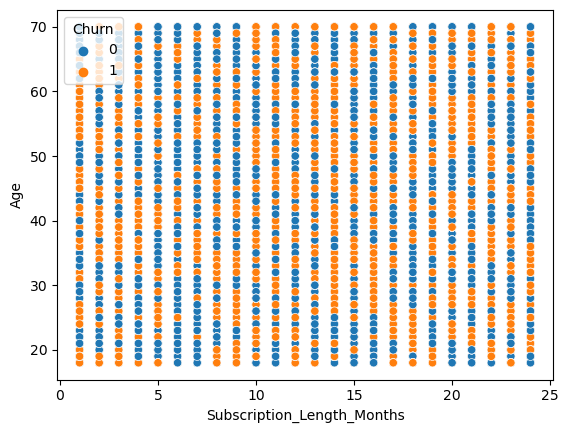

In [44]:
# checking for correlation b/w `Age ` and `Subscription_Length_Months` coln
sns.scatterplot(x=new_data['Subscription_Length_Months'], y=new_data['Age'], hue=new_data['Churn'])

<Axes: xlabel='Monthly_Bill', ylabel='Age'>

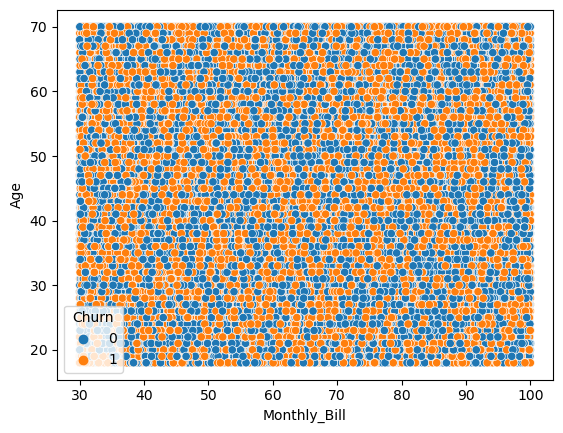

In [45]:
# checking for correlation b/w `Age ` and `Monthly_Bill` coln
sns.scatterplot(x=new_data['Monthly_Bill'], y=new_data['Age'], hue=new_data['Churn'])

<Axes: xlabel='Total_Usage_GB', ylabel='Age'>

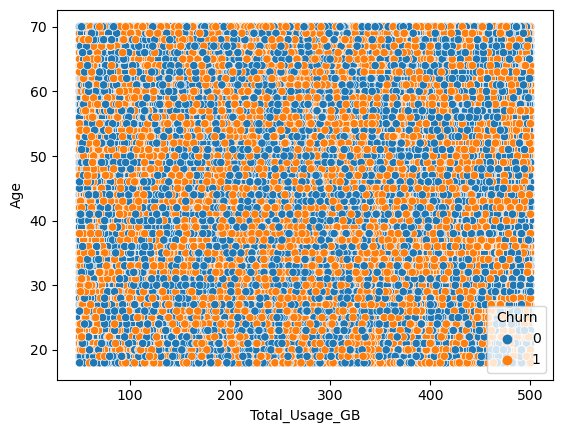

In [46]:
# checking for correlation b/w `Age ` and `Total_Usage_GB` coln
sns.scatterplot(x=new_data['Total_Usage_GB'], y=new_data['Age'], hue=new_data['Churn'])

<Axes: xlabel='Subscription_Length_Months', ylabel='Total_Usage_GB'>

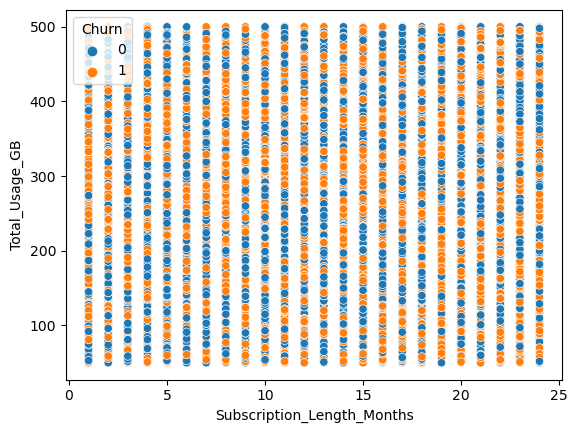

In [47]:
# checking for correlation b/w `Subscription_Length_Months` and `Total_Usage_GB` coln
sns.scatterplot(x=new_data['Subscription_Length_Months'], y=new_data['Total_Usage_GB'], hue=new_data['Churn'])

By Analyzing this data at this extent, I have got to know this dataset is arranged in the manner as there is no relation b/w any columns and even distributions are very uniformly arranged. It suggests all columns holds equal importance in **Model Building**.

In [48]:
new_data.sample(1)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
49785,39,Female,Houston,5,45.81,218,1


In [49]:
# Divide the data in `features` and `target`
X = new_data.iloc[:, :-1]
y = new_data.iloc[:, -1]

### **Time to Create `Model`**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

In [51]:
# Divide the data in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90000, 6), (10000, 6), (90000,), (10000,))

In [52]:
# Differentiate `Categorical` & `Numerical` features
categorical_features = ['Gender', 'Location']
numerical_features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Create `StandardScalar` and `OneHotEncoder` Object
one_hot_encoder = OneHotEncoder()
standard_scalar = StandardScaler()


# Create ColumnTransformer Object for `Preprocessing Stuff`
preprocesser = ColumnTransformer(transformers=(
    ('encode_gender', one_hot_encoder, categorical_features),
    ('standardization', standard_scalar, numerical_features)
))

In [53]:
# Create `Model Pipeline` for Logistic Regression
clf = Pipeline(steps=(
    ('preprocessing', preprocesser),
    ('classifier', LogisticRegression())
))

In [54]:
clf.fit(X_train, y_train)
print("Accuracy score of Logistic Regression is: ", clf.score(X_test, y_test))

Accuracy score of Logistic Regression is:  0.4994


In [55]:
# Check score using other metrics like `Precision Score`, `Recall Score`, `F1 Score`
y_pred = clf.predict(X_test)

print("The precision score of Logistic Regression is: ", precision_score(y_test, y_pred))
print("The recall score of Logistic Regression is: ", recall_score(y_test, y_pred))
print("The F1 score of Logistic Regression is: ", f1_score(y_test, y_pred))

The precision score of Logistic Regression is:  0.4985514880168554
The recall score of Logistic Regression is:  0.378978978978979
The F1 score of Logistic Regression is:  0.4306187443130118


In [56]:
# Create `Model Pipeline` for `RandomForestClassifier` 
clf2 = Pipeline(steps=[
    ('preprocessing', preprocesser),
    ('classifier', RandomForestClassifier())
])

In [57]:
clf2.fit(X_train, y_train)
print("The accuracy score of Random Forest Classifier is:", clf2.score(X_test, y_test))

The accuracy score of Random Forest Classifier is: 0.4978


In [58]:
# Check score using other metrics like `Precision Score`, `Recall Score`, `F1 Score`
y_pred = clf2.predict(X_test)

print("The precision score of Logistic Regression is: ", precision_score(y_test, y_pred))
print("The recall score of Logistic Regression is: ", recall_score(y_test, y_pred))
print("The F1 score of Logistic Regression is: ", f1_score(y_test, y_pred))

The precision score of Logistic Regression is:  0.4971380114479542
The recall score of Logistic Regression is:  0.4694694694694695
The F1 score of Logistic Regression is:  0.4829077429983526


General Machine Learning is not showing that good of a result, but actually that's very logical as there was not any relation between features and Machine Learning tries to find the best line matching the relation. So, I hadn't expected anything more.

### **Now time to head for `Deep Learning`, let's see how deep I can dig**

In [59]:
import tensorflow as tf
from tensorflow import keras

In [60]:
# Create `Features` & `Targets`
features = preprocesser.fit_transform(X_train)
targets = y_train

In [61]:
# Create Model using `Sequential` layer
model = keras.Sequential(layers=[
    keras.layers.Dense(units=64, activation="relu", input_shape=(features.shape[1], )),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=1, activation="sigmoid")
])

In [62]:
# Add `Optimizer` and `Loss` function
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [63]:
# Check brief summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [64]:
# Finally time to train the model
model.fit(x=features, y=targets, batch_size=1000, epochs=50, validation_split=0.2)

Epoch 1/50
72/72 [==============================] - 2s 12ms/step - loss: 0.6955 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 2/50
72/72 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.5025 - val_loss: 0.6933 - val_accuracy: 0.4961
Epoch 3/50
72/72 [==============================] - 1s 8ms/step - loss: 0.6935 - accuracy: 0.5004 - val_loss: 0.6933 - val_accuracy: 0.4962
Epoch 4/50
72/72 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5064 - val_loss: 0.6932 - val_accuracy: 0.5036
Epoch 5/50
72/72 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4946
Epoch 6/50
72/72 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.4969
Epoch 7/50
72/72 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5053 - val_loss: 0.6931 - val_accuracy: 0.5058
Epoch 8/50
72/72 [=

Even a well curated `Deep Learning` model was not able to get accuracy over 51% on validation set. At the very least this was expected with the dataset it was training on.

In [65]:
# Test the model
test_features = preprocesser.transform(X_test)
test_targets = y_test

model.evaluate(test_features, test_targets)

313/313 [==============================] - 1s 1ms/step - loss: 0.6944 - accuracy: 0.4878


[0.6944395303726196, 0.4878000020980835]